In [1]:
# Dataframes
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data
from sklearn.model_selection import train_test_split

# Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Import data
df = pd.read_csv('nmf_categories_apr17.csv')

# Drop nulls
df = df.dropna()

# Clarify independent and dependent variables
x = df['text']
y = df[['type', 'topic']]

In [3]:
# Specify vectorizer to be used
vectorizer = TfidfVectorizer()

In [4]:
# Create vectorized versions of relevant datasets
x = vectorizer.fit_transform(x)

In [5]:
from sklearn.linear_model import LogisticRegression

# Define the model for Multinomial Logistic Regression with minimized regularization
mlr = LogisticRegression(multi_class = 'multinomial', n_jobs=-1, random_state=0)

# Fit the model
mlr.fit(x, y['type'])

# Make predictions
preds = mlr.predict(x)

In [6]:
# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get coefficients from the model
coefficients = mlr.coef_

# Create a DataFrame to map coefficients to features
coefficients_df = pd.DataFrame(coefficients, columns=feature_names, index=mlr.classes_)

temp = coefficients_df.T

database = temp['database']
deploy = temp['deploy']
elasticsearch = temp['elasticsearch']
fastly = temp['fastly']
redis = temp['redis']
resources = temp['resources']
sendgrid = temp['sendgrid']
upgrade_services = temp['upgrade_services']
upsize = temp['upsize']

database = database.sort_values(ascending=False)
deploy = deploy.sort_values(ascending=False)
elasticsearch = elasticsearch.sort_values(ascending=False)
fastly = fastly.sort_values(ascending=False)
redis = redis.sort_values(ascending=False)
resources = resources.sort_values(ascending=False)
sendgrid = sendgrid.sort_values(ascending=False)
upgrade_services = upgrade_services.sort_values(ascending=False)
upsize = upsize.sort_values(ascending=False)

database = database.reset_index()
deploy = deploy.reset_index()
elasticsearch = elasticsearch.reset_index()
fastly = fastly.reset_index()
redis = redis.reset_index
resources = resources.reset_index()
sendgrid = sendgrid.reset_index()
upgrade_services = upgrade_services.reset_index()
upsize = upsize.reset_index()

database_og = list(database['index'])
deploy_og = list(deploy['index'])
elasticsearch_og = list(elasticsearch['index'])
fastly_og = list(fastly['index'])
redis_og = list(database['index'])
resources_og = list(resources['index'])
sendgrid_og = list(sendgrid['index'])
upgrade_services_og = list(upgrade_services['index'])
upsize_og = list(upsize['index'])

In [7]:
# Define the model for Multinomial Logistic Regression with minimized regularization
mlr = LogisticRegression(multi_class = 'multinomial', n_jobs=-1, random_state=0)

# Fit the model
mlr.fit(x, y['topic'])

# Make predictions
preds = mlr.predict(x)

In [8]:
# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get coefficients from the model
coefficients = mlr.coef_

# Create a DataFrame to map coefficients to features
coefficients_df = pd.DataFrame(coefficients, columns=feature_names, index=mlr.classes_)

temp = coefficients_df.T

database = temp['database']
db_admin = temp['Database_Admin']
deploy = temp['Deploy']
elasticsearch = temp['Elasticsearch']
fastly = temp['Fastly']
redis = temp['Redis']
resources = temp['Resources']
sendgrid = temp['Sendgrid']
upgrade_services = temp['Upgrade_services']
upsize = temp['Upsize']

database = database.sort_values(ascending=False)
db_admin = db_admin.sort_values(ascending=False)
deploy = deploy.sort_values(ascending=False)
elasticsearch = elasticsearch.sort_values(ascending=False)
fastly = fastly.sort_values(ascending=False)
redis = redis.sort_values(ascending=False)
resources = resources.sort_values(ascending=False)
sendgrid = sendgrid.sort_values(ascending=False)
upgrade_services = upgrade_services.sort_values(ascending=False)
upsize = upsize.sort_values(ascending=False)

database = database.reset_index()
db_admin = db_admin.reset_index()
deploy = deploy.reset_index()
elasticsearch = elasticsearch.reset_index()
fastly = fastly.reset_index()
redis = redis.reset_index
resources = resources.reset_index()
sendgrid = sendgrid.reset_index()
upgrade_services = upgrade_services.reset_index()
upsize = upsize.reset_index()

database_nmf = list(database['index'])
db_admin_nmf = list(db_admin['index'])
deploy_nmf = list(deploy['index'])
elasticsearch_nmf = list(elasticsearch['index'])
fastly_nmf = list(fastly['index'])
redis_nmf = list(database['index'])
resources_nmf = list(resources['index'])
sendgrid_nmf = list(sendgrid['index'])
upgrade_services_nmf = list(upgrade_services['index'])
upsize_nmf = list(upsize['index'])

In [9]:
table = pd.DataFrame({'OG Database Descending Terms': database_og,'NMF Database Descending Terms': database_nmf,
                      'OG Deploy Descending Terms': deploy_og, 'NMF Deploy Descending Terms': deploy_nmf,
                      'OG Elasticsearch Descending Terms': elasticsearch_og, 'NMF Elasticsearch Descending Terms': elasticsearch_nmf,
                      'OG Fastly Descending Terms': fastly_og, 'NMF Fastly Descending Terms': fastly_nmf,
                      'OG Redis Descending Terms': redis_og, 'NMF Redis Descending Terms': redis_nmf,
                      'OG Resources Descending Terms': resources_og, 'NMF Resources Descending Terms': resources_nmf,
                      'OG Sendgrid Descending Terms': sendgrid_og, 'NMF Sendgrid Descending Terms': sendgrid_nmf,
                      'OG Upgrade Services Descending Terms': upgrade_services_og, 'NMF Upgrade Services Descending Terms': upgrade_services_nmf,
                      'OG Upsize Descending Terms': upsize_og, 'NMF Upsize Descending Terms': upsize_nmf,
                      'NMF Database Admin Descending Terms': db_admin_nmf})

table

,OG Database Descending Terms,NMF Database Descending Terms,OG Deploy Descending Terms,NMF Deploy Descending Terms,OG Elasticsearch Descending Terms,NMF Elasticsearch Descending Terms,OG Fastly Descending Terms,NMF Fastly Descending Terms,OG Redis Descending Terms,NMF Redis Descending Terms,OG Resources Descending Terms,NMF Resources Descending Terms,OG Sendgrid Descending Terms,NMF Sendgrid Descending Terms,OG Upgrade Services Descending Terms,NMF Upgrade Services Descending Terms,OG Upsize Descending Terms,NMF Upsize Descending Terms,NMF Database Admin Descending Terms
0,database,database,deploy,deploy,elastic,elastic,fastly,fastly,database,database,space,space,sendgrid,sendgrid,upgrade,upgrade,upsize,upsize,sql
1,sql,backup,push,fail,search,search,block,country,sql,backup,storage,disk,mail,domain,elastic,version,capacity,surge,table
2,dump,dump,build,stick,open,open,domain,image,dump,dump,disk,increase,send,mail,search,service,infrastructure,capacity,log
3,deadlock,table,builder,integration,product,analysis,bot,block,deadlock,table,medium,storage,account,record,version,maria,scale,scale,galera
4,query,snap,fail,composer,configuration,number,cache,geo,query,snap,sql,app,domain,send,maria,setup,upgrade,date,server
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7550,upgrade,elastic,increase,sql,fastly,sql,sql,database,upgrade,elastic,capacity,memory,deploy,sql,increase,fastly,error,sql,cloud
7551,version,deploy,sql,database,redis,upsize,storage,record,version,deploy,service,database,sql,upsize,fail,memory,sql,fastly,deploy
7552,elastic,fastly,elastic,cache,upsize,memory,database,elastic,elastic,fastly,upsize,elastic,fastly,database,upsize,integration,fastly,database,build
7553,search,upgrade,search,elastic,database,database,elastic,deploy,search,upgrade,deploy,upsize,database,deploy,size,sql,deploy,upgrade,production


In [10]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7555 entries, 0 to 7554
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   OG Database Descending Terms           7555 non-null   object
 1   NMF Database Descending Terms          7555 non-null   object
 2   OG Deploy Descending Terms             7555 non-null   object
 3   NMF Deploy Descending Terms            7555 non-null   object
 4   OG Elasticsearch Descending Terms      7555 non-null   object
 5   NMF Elasticsearch Descending Terms     7555 non-null   object
 6   OG Fastly Descending Terms             7555 non-null   object
 7   NMF Fastly Descending Terms            7555 non-null   object
 8   OG Redis Descending Terms              7555 non-null   object
 9   NMF Redis Descending Terms             7555 non-null   object
 10  OG Resources Descending Terms          7555 non-null   object
 11  NMF Resources Des

In [11]:
table = table.head(100)

In [12]:
table

,OG Database Descending Terms,NMF Database Descending Terms,OG Deploy Descending Terms,NMF Deploy Descending Terms,OG Elasticsearch Descending Terms,NMF Elasticsearch Descending Terms,OG Fastly Descending Terms,NMF Fastly Descending Terms,OG Redis Descending Terms,NMF Redis Descending Terms,OG Resources Descending Terms,NMF Resources Descending Terms,OG Sendgrid Descending Terms,NMF Sendgrid Descending Terms,OG Upgrade Services Descending Terms,NMF Upgrade Services Descending Terms,OG Upsize Descending Terms,NMF Upsize Descending Terms,NMF Database Admin Descending Terms
0,database,database,deploy,deploy,elastic,elastic,fastly,fastly,database,database,space,space,sendgrid,sendgrid,upgrade,upgrade,upsize,upsize,sql
1,sql,backup,push,fail,search,search,block,country,sql,backup,storage,disk,mail,domain,elastic,version,capacity,surge,table
2,dump,dump,build,stick,open,open,domain,image,dump,dump,disk,increase,send,mail,search,service,infrastructure,capacity,log
3,deadlock,table,builder,integration,product,analysis,bot,block,deadlock,table,medium,storage,account,record,version,maria,scale,scale,galera
4,query,snap,fail,composer,configuration,number,cache,geo,query,snap,sql,app,domain,send,maria,setup,upgrade,date,server
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,old,ai,poll,cha,not,replace,track,condition,old,ai,remote,electronics,notification,library,ready,resource,emergency,transfer,privilege
96,load,malicious,phase,payment,mismatch,promise,invalidation,content,load,malicious,system,copy,setting,imagery,meadow,vertex,change,temporally,injection
97,intelligence,schema,minify,mi,head,bug,dart,map,intelligence,schema,extend,integer,modena,alan,sha,token,level,click,rating
98,locally,store,plan,scenario,due,sizing,coach,justice,locally,store,component,become,shipment,secure,dynamic,later,want,south,exporter


In [13]:
db = list(table['OG Database Descending Terms'])
dp = list(table['OG Deploy Descending Terms'])
es = list(table['OG Elasticsearch Descending Terms'])
fs = list(table['OG Fastly Descending Terms'])
rd = list(table['OG Redis Descending Terms'])
rs = list(table['OG Resources Descending Terms'])
sg = list(table['OG Sendgrid Descending Terms'])
us = list(table['OG Upgrade Services Descending Terms'])
up = list(table['OG Upsize Descending Terms'])

df = table

df['Database Similarity'] = ''
df.loc[df['NMF Database Descending Terms'].isin(db), 'Database Similarity']=1
df.loc[df['Database Similarity'] != 1, 'Database Similarity']=0

df['Deploy Similarity'] = ''
df.loc[df['NMF Deploy Descending Terms'].isin(dp), 'Deploy Similarity']=1
df.loc[df['Deploy Similarity'] != 1, 'Deploy Similarity']=0

df['Elasticsearch Similarity'] = ''
df.loc[df['NMF Elasticsearch Descending Terms'].isin(es), 'Elasticsearch Similarity']=1
df.loc[df['Elasticsearch Similarity'] != 1, 'Elasticsearch Similarity']=0

df['Fastly Similarity'] = ''
df.loc[df['NMF Fastly Descending Terms'].isin(fs), 'Fastly Similarity']=1
df.loc[df['Fastly Similarity'] != 1, 'Fastly Similarity']=0

df['Redis Similarity'] = ''
df.loc[df['NMF Redis Descending Terms'].isin(rd), 'Redis Similarity']=1
df.loc[df['Redis Similarity'] != 1, 'Redis Similarity']=0

df['Resources Similarity'] = ''
df.loc[df['NMF Resources Descending Terms'].isin(rs), 'Resources Similarity']=1
df.loc[df['Resources Similarity'] != 1, 'Resources Similarity']=0

df['Sendgrid Similarity'] = ''
df.loc[df['NMF Sendgrid Descending Terms'].isin(sg), 'Sendgrid Similarity']=1
df.loc[df['Sendgrid Similarity'] != 1, 'Sendgrid Similarity']=0

df['Upgrade Services Similarity'] = ''
df.loc[df['NMF Upgrade Services Descending Terms'].isin(us), 'Upgrade Services Similarity']=1
df.loc[df['Upgrade Services Similarity'] != 1, 'Upgrade Services Similarity']=0

df['Upsize Similarity'] = ''
df.loc[df['NMF Upsize Descending Terms'].isin(up), 'Upsize Similarity']=1
df.loc[df['Upsize Similarity'] != 1, 'Upsize Similarity']=0

df

C:\Users\maxwe\AppData\Local\Temp\ipykernel_28876\2098347415.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Database Similarity'] = ''
C:\Users\maxwe\AppData\Local\Temp\ipykernel_28876\2098347415.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Deploy Similarity'] = ''
C:\Users\maxwe\AppData\Local\Temp\ipykernel_28876\2098347415.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,OG Database Descending Terms,NMF Database Descending Terms,OG Deploy Descending Terms,NMF Deploy Descending Terms,OG Elasticsearch Descending Terms,NMF Elasticsearch Descending Terms,OG Fastly Descending Terms,NMF Fastly Descending Terms,OG Redis Descending Terms,NMF Redis Descending Terms,...,NMF Database Admin Descending Terms,Database Similarity,Deploy Similarity,Elasticsearch Similarity,Fastly Similarity,Redis Similarity,Resources Similarity,Sendgrid Similarity,Upgrade Services Similarity,Upsize Similarity
0,database,database,deploy,deploy,elastic,elastic,fastly,fastly,database,database,...,sql,1,1,1,1,1,1,1,1,1
1,sql,backup,push,fail,search,search,block,country,sql,backup,...,table,1,1,1,1,1,1,1,1,1
2,dump,dump,build,stick,open,open,domain,image,dump,dump,...,log,1,1,1,1,1,1,1,1,1
3,deadlock,table,builder,integration,product,analysis,bot,block,deadlock,table,...,galera,1,0,0,1,1,1,1,1,1
4,query,snap,fail,composer,configuration,number,cache,geo,query,snap,...,server,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,old,ai,poll,cha,not,replace,track,condition,old,ai,...,privilege,0,0,0,0,0,0,0,0,0
96,load,malicious,phase,payment,mismatch,promise,invalidation,content,load,malicious,...,injection,0,0,0,1,0,0,0,0,0
97,intelligence,schema,minify,mi,head,bug,dart,map,intelligence,schema,...,rating,0,0,0,0,0,0,0,0,0
98,locally,store,plan,scenario,due,sizing,coach,justice,locally,store,...,exporter,0,0,0,0,0,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   OG Database Descending Terms           100 non-null    object
 1   NMF Database Descending Terms          100 non-null    object
 2   OG Deploy Descending Terms             100 non-null    object
 3   NMF Deploy Descending Terms            100 non-null    object
 4   OG Elasticsearch Descending Terms      100 non-null    object
 5   NMF Elasticsearch Descending Terms     100 non-null    object
 6   OG Fastly Descending Terms             100 non-null    object
 7   NMF Fastly Descending Terms            100 non-null    object
 8   OG Redis Descending Terms              100 non-null    object
 9   NMF Redis Descending Terms             100 non-null    object
 10  OG Resources Descending Terms          100 non-null    object
 11  NMF Resources Descen

In [15]:
lbl_sims = ['Database Similarity', 'Deploy Similarity', 'Elasticsearch Similarity', 'Fastly Similarity', 'Redis Similarity', 'Resources Similarity', 'Sendgrid Similarity', 'Upgrade Services Similarity', 'Upsize Similarity']

df[lbl_sims] = df[lbl_sims].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   OG Database Descending Terms           100 non-null    object
 1   NMF Database Descending Terms          100 non-null    object
 2   OG Deploy Descending Terms             100 non-null    object
 3   NMF Deploy Descending Terms            100 non-null    object
 4   OG Elasticsearch Descending Terms      100 non-null    object
 5   NMF Elasticsearch Descending Terms     100 non-null    object
 6   OG Fastly Descending Terms             100 non-null    object
 7   NMF Fastly Descending Terms            100 non-null    object
 8   OG Redis Descending Terms              100 non-null    object
 9   NMF Redis Descending Terms             100 non-null    object
 10  OG Resources Descending Terms          100 non-null    object
 11  NMF Resources Descen

C:\Users\maxwe\AppData\Local\Temp\ipykernel_28876\2390536186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[lbl_sims] = df[lbl_sims].astype(int)


In [16]:
for lbl_sim in lbl_sims:
    print(f'{lbl_sim}: {df[lbl_sim].sum()}')

Database Similarity: 25
Deploy Similarity: 36
Elasticsearch Similarity: 33
Fastly Similarity: 38
Redis Similarity: 25
Resources Similarity: 36
Sendgrid Similarity: 41
Upgrade Services Similarity: 27
Upsize Similarity: 46


In [17]:
similarities = [25, 36, 33, 38, 25, 36, 41, 27, 46]

labels = ['Database', 'Deploy', 'Elasticsearch', 'Fastly', 'Redis', 'Resources', 'Sendgrid', 'Upgrade Services', 'Upsize']

temp = pd.DataFrame({'OG/NMF Word Similarity Percent': similarities,
                     'Category': labels})

temp

,OG/NMF Word Similarity Percent,Category
0,25,Database
1,36,Deploy
2,33,Elasticsearch
3,38,Fastly
4,25,Redis
5,36,Resources
6,41,Sendgrid
7,27,Upgrade Services
8,46,Upsize


In [18]:
temp=temp.set_index('Category')
temp

,OG/NMF Word Similarity Percent
Category,
Database,25
Deploy,36
Elasticsearch,33
Fastly,38
Redis,25
Resources,36
Sendgrid,41
Upgrade Services,27
Upsize,46


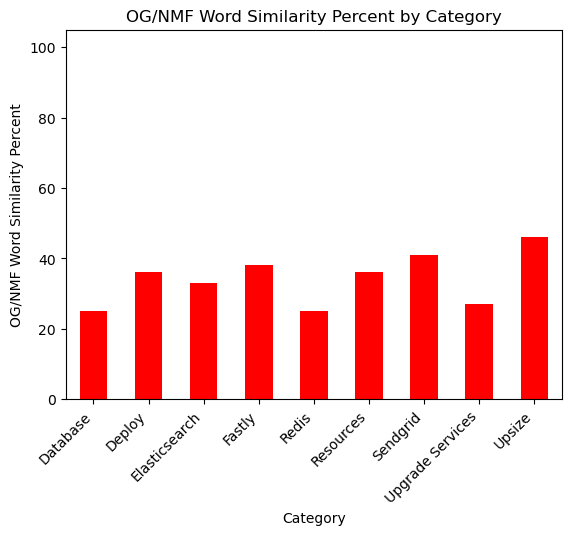

In [19]:
import matplotlib.pyplot as plt

ax = temp.plot(kind='bar',
                title = 'OG/NMF Word Similarity Percent by Category',
                xlabel = 'Category', ylabel = 'OG/NMF Word Similarity Percent',
                color='red', legend=False)
plt.xticks(rotation=45,ha='right')
plt.ylim(0,105)
plt.show()

In [21]:
table.to_csv('class_important_word_comparisons.csv')